In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

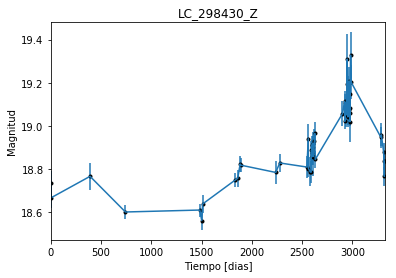

In [2]:
data = np.genfromtxt('LC_298430_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_298430_Z')
plt.savefig("LC_298430_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

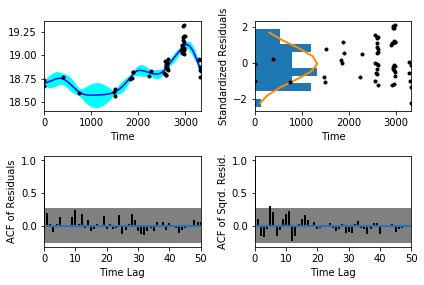

In [5]:
sample.assess_fit()

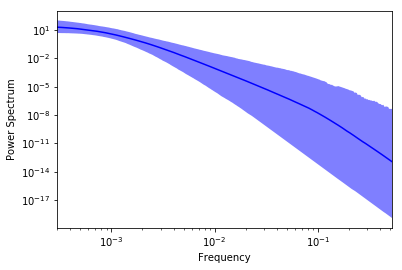

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

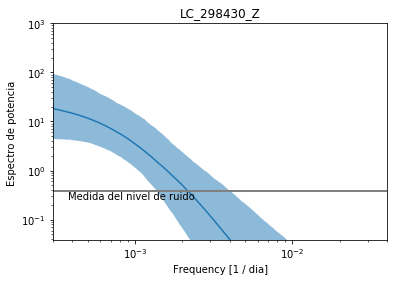

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_298430_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_298430_Z')

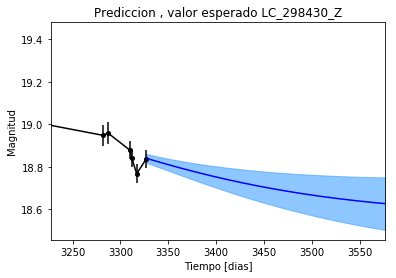

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_298430_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_298430_Z')

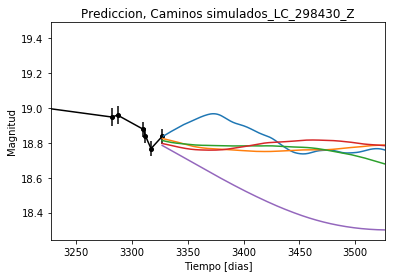

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_298430_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


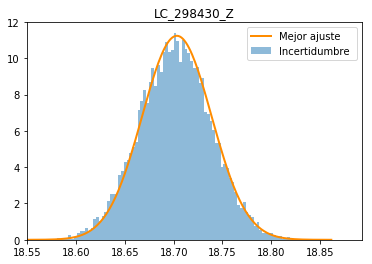

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_298430_Z')
plt.savefig("Mejor_ajuste_LC_297623_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_297623_Z')

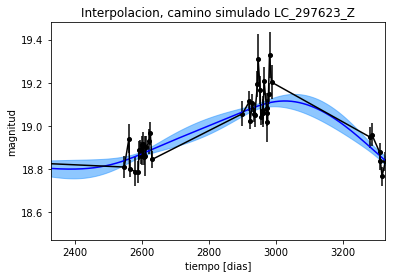

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_297623_Z')

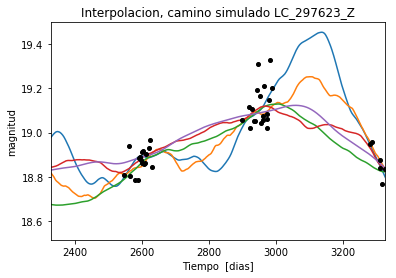

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 316.555324721
Median: 0.0107427854884
Standard deviation: 0.196062995992
68% credibility interval: [ 0.00078886  0.19702163]
95% credibility interval: [  3.45105399e-04   7.80490320e-01]
99% credibility interval: [  3.08859711e-04   9.79617921e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 717.487922643
Median: 0.00143270562203
Standard deviation: 0.0824492258719
68% credibility interval: [ 0.00044246  0.02201928]
95% credibility interval: [ 0.00031687  0.27299282]
99% credibility interval: [  3.04487843e-04   5.95775168e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 421.480947843
Median: 0.00540173760532
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2349.91153162
Median: 89.7746871417
Standard deviation: 1.57082948829
68% credibility interval: [ 87.94144793  90.79989291]
95% credibility interval: [ 85.32029147  91.29923732]
99% credibility interval: [ 83.29725764  91.46469478]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 221.926768247
Median: 0.4318028434
Standard deviation: 2.02791477425
68% credibility interval: [ 0.04301172  3.38480621]
95% credibility interval: [ 0.01284499  6.70224339]
99% credibility interval: [  9.19292259e-03   9.48119079e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 349.731961904
Median: 0.227290874281
Standard deviation: 8.20993920475
68% credibility interval: [  5.93799448e-03   6.38810873e+00]
95% credibility interval

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4654.45776376
Median: 1.45226192425e-23
Standard deviation: 2.23405466737e+45
68% credibility interval: [  6.19549666e-68   1.52594740e-06]
95% credibility interval: [  1.10736961e-122   1.02464368e+001]
99% credibility interval: [  4.56536255e-140   1.73446023e+021]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2340.86577202
Median: 18.7648023372
Standard deviation: 0.107218068977
68% credibility interval: [ 18.66788409  18.84562392]
95% credibility interval: [ 18.52528025  18.95292886]
99% credibility interval: [ 18.3583632   19.07246899]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 269.655960959
Median: 0.00129985308171
Standard deviation: 0.236480421742
68% credibility interval: [ 0.          0.30091402]
95% credibility interval: [ 0.          0.88129241]
99% credibility interval: [ 0.          1.01359516]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 269.655960959
Median: 0.00129985308171
Standard deviation: 0.236480421742
68% credibility interval: [ 0.          0.30091402]
95% credibility interval: [ 0.          0.88129241]
99% credibility interval: [ 0.          1.01359516]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 616.764404574
Median: 0.0
Standard deviation: 0.000290842086647
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2349.91153162
Median: 89.7746871417
Standard deviation: 1.57082948829
68% credibility interval: [ 87.94144793  90.79989291]
95% credibility interval: [ 85.32029147  91.29923732]
99% credibility interval: [ 83.29725764  91.46469478]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3375.72583103
Median: 0.0327600052131
Standard deviation: 0.0444409872913
68% credibility interval: [ 0.01869465  0.06444252]
95% credibility interval: [ 0.0117648   0.14786192]
99% credibility interval: [ 0.00886551  0.28056667]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2185.88767643
Median: 1.06221649507
Standard deviation: 0.165477215994
68% credibility interval: [ 0.91788788  1.23660395]
95% credibility interval: [ 0.80351368  1.45247279]
99% credibility interval: [ 0.74019867  1.61197812]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1436.18445058
Median: 3.33637501624e-05
Standard deviation: 0.0390653134553
68% credibility interval: [  5.37752574e-07   1.28956555e-03]
95% credibility interval: [  2.27375919e-08   1.11374760e-02]
99% credibility interval: [  3.54172123e-25   1.78483418e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 316.555324721
Median: (-0.0674989119389+0j)
Standard deviation: 1.93011116053
68% credibility interval: [-1.23792343-0.77104537j -0.00495658-0.78300998j]
95% credibility interval: [ -4.90396531e+00 -6.52730162e+00j  -2.16836117e-03 -1.81558330e-03j]
99% credibility interval: [ -6.15512093e+00+0.j          -1.94062280e-03-2.98747463j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 717.487922643
Median: (-0.00900195491388+0j)
Standard deviation: 1.57356934696
68% credibility interval: [-0.13835120+0.34740401j -0.00278004+0.07664952j]
95% credibility interval: [-1.71526448+4.5828642j -0.00199097+0.j       ]
99% credibility interval: [ -3.74336578e+00 +3.63471220e+00j  -1.91315354e-03 +1.46502892e-03j]
Posterior summary f